<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/IMT_TFIDF_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Bag of Words, TF-IDF & Word Embedding**



Aprenda as principais formas de representação de dados textuais como Bag of Words,
TF IDF e Word2vec em Python e a biblioteca de processamento de linguagem natural.
Descubra ao final o quanto um texto seu se aproxima da obra do escritor Machado de
Assis.

**Vamos começar por [aqui](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/others/IMT_TFIDF_word2vec.pdf)**.

Nosso objetivo aqui é apresentar a técnica *word embedding* criada em  2013 pela equipe da Google liderada por Tomas Mikolov empregando as bibliotecas de processamento de linguagem natural `nltk` e `gensim`.

# Modelos tradicionais BOW e TFIDF
## Read Tweets (Documents)

Vamos empregar nos exemplos a seguir a seguinte base de Tweets:

https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis

Eles serão nossos documentos iniciais.

## `nltk` e `gensim`

`nltk` e `gensim` são bibliotecas `python` para o processamento de linguagem natural e que implementam uma série de funções, desde de representações vetoriais (bow, tf-idf e word2vec) como também funções de similaridade, n-gramas, stemming, stopwords, concordância, segmentação, *corpus*, *teokenização* etc.

Esses pontos são explorados rapidamente aqui como o uso de presentações **BOW** e **TFIDF**. Mas na apresentação vamos diretamente para o emprego do **Word2Vec**.

In [ ]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
print ("nltk, gesim initialization ok")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


nltk, gesim initialization ok


## Acessando 37K Tweets

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TweetsNeutralNews.csv')
print(df.iloc[0])
print(df.shape)

id                                          1038992008461930496
tweet_text    Esquerda e direita empatam na Suécia; ultranac...
tweet_date                       Mon Sep 10 03:26:13 +0000 2018
sentiment                                                Neutro
query_used                                                 veja
Name: 0, dtype: object
(37556, 5)


## Sampling... ?

In [ ]:
df = df.sample(1000) # Para reduzir a quantidade de dados para a apresentação

## Tokenize

A tokenização é a função de separar os elementos dos documentos. Em geral empregamos palavras ou termos. Mas também podemos empregar frases.

In [ ]:
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  doc_words.append(tokens)

# remove tweet ids... //t.co/1naa40inw5
def cleanTweetIds():
  for i in range(len(doc_words)):
    for j in range(len(doc_words[i])):
      if doc_words[i][j].count('//') > 0:
        doc_words[i][j] = ''

  for doc in doc_words:
    if doc.count('') > 0:
      doc.remove('')

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10])





doc_words[ 0 ] ['&', 'gt', ';', '@', 'fausto_macedo', 'delatores', 'revelam', 'operador', 'de', 'propinas']
doc_words[ 1 ] ['shark', 'tank', ':', 'investidores', 'apontam', 'maiores', 'erros', 'de', 'empreendedores', 'https']
doc_words[ 2 ] ['instagram', 'tem', 'novo', 'ceo', 'após', 'saída', 'abrupta', 'de', 'cofundadores', 'https']
doc_words[ 3 ] ['com', 'alta', 'do', 'dólar', ',', 'preço', 'do', 'diesel', 'sobe', 'até']
doc_words[ 4 ] ['para', 'a', 'cbf', ',', 'neymar', 'teve', "'corajosa", 'e', 'destacada', 'participação']
doc_words[ 5 ] ['&', 'gt', ';', '@', 'estadaopolitica', 'marcio', 'lacerda', 'desiste', 'de', 'disputar']
doc_words[ 6 ] ['você', 'sabe', 'se', 'a', 'situação', 'do', 'seu', 'título', 'eleitoral', 'está']
doc_words[ 7 ] ['a', 'mulher', 'que', 'nasceu', 'sem', 'as', 'pernas', ',', 'foi', 'abandonada']
doc_words[ 8 ] ['em', 'gravação', ',', 'ex-assessora', 'de', 'trump', 'ameaça', 'revelar', 'corrupção', '-']
doc_words[ 9 ] ['partido', 'novo', 'afirma', 'que', 'não

## Criando nosso Dicionário, 30K Words!

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'': 0, '&': 1, ',': 2, ':': 3, ';': 4, '@': 5, 'ajuste': 6, 'de': 7, 'delatores': 8, 'do': 9, 'em': 10, 'fausto_macedo': 11, 'gt': 12, 'hotel': 13, 'https': 14, 'mercado': 15, 'operador': 16, 'para': 17, 'propinas': 18, 'reunião': 19, 'revelam': 20, 'rodoanel': 21, '‘': 22, '’': 23, 'apontam': 24, 'empreendedores': 25, 'erros': 26, 'investidores': 27, 'maiores': 28, 'shark': 29, 'tank': 30, 'abrupta': 31, 'após': 32, 'ceo': 33, 'cofundadores': 34, 'instagram': 35, 'novo': 36, 'saída': 37, 'tem': 38, '%': 39, '(': 40, ')': 41, '14,4': 42, '31': 43, 'alta': 44, 'até': 45, 'com': 46, 'diesel': 47, 'dólar': 48, 'nesta': 49, 'preço': 50, 'sexta': 51, 'sobe': 52, "'": 53, "'corajosa": 54, '.': 55, 'a': 56, 'cbf': 57, 'copa': 58, 'destacada': 59, 'e': 60, 'na': 61, 'neymar': 62, 'participação': 63, 'teve': 64, 'desiste': 65, 'disputar': 66, 'estadaopolitica': 67, 'governo': 68, 'lacerda': 69, 'marcio': 70, 'minas': 71, 'pressão': 72, 'psb': 73, '#': 74, '?': 75, 'eleicoes2018': 76, 'eleitora

In [ ]:
print(len(dictionary.token2id))

4360


## BOW de um documento

Veja aqui a representação condensada do modelo BOW.

In [ ]:
for i in range(5):
  print('doc_words[', i , ']',doc_words[i][0:10])
  print(dictionary.doc2bow(doc_words[i]))


doc_words[ 0 ] ['&', 'gt', ';', '@', 'fausto_macedo', 'delatores', 'revelam', 'operador', 'de', 'propinas']
[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]
doc_words[ 1 ] ['shark', 'tank', ':', 'investidores', 'apontam', 'maiores', 'erros', 'de', 'empreendedores', 'https']
[(3, 2), (7, 1), (14, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
doc_words[ 2 ] ['instagram', 'tem', 'novo', 'ceo', 'após', 'saída', 'abrupta', 'de', 'cofundadores', 'https']
[(3, 1), (7, 1), (14, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]
doc_words[ 3 ] ['com', 'alta', 'do', 'dólar', ',', 'preço', 'do', 'diesel', 'sobe', 'até']
[(2, 1), (3, 1), (9, 2), (14, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]
doc_words[ 4 ] ['pa

### Word Cloud... termos frequentes sem significado!

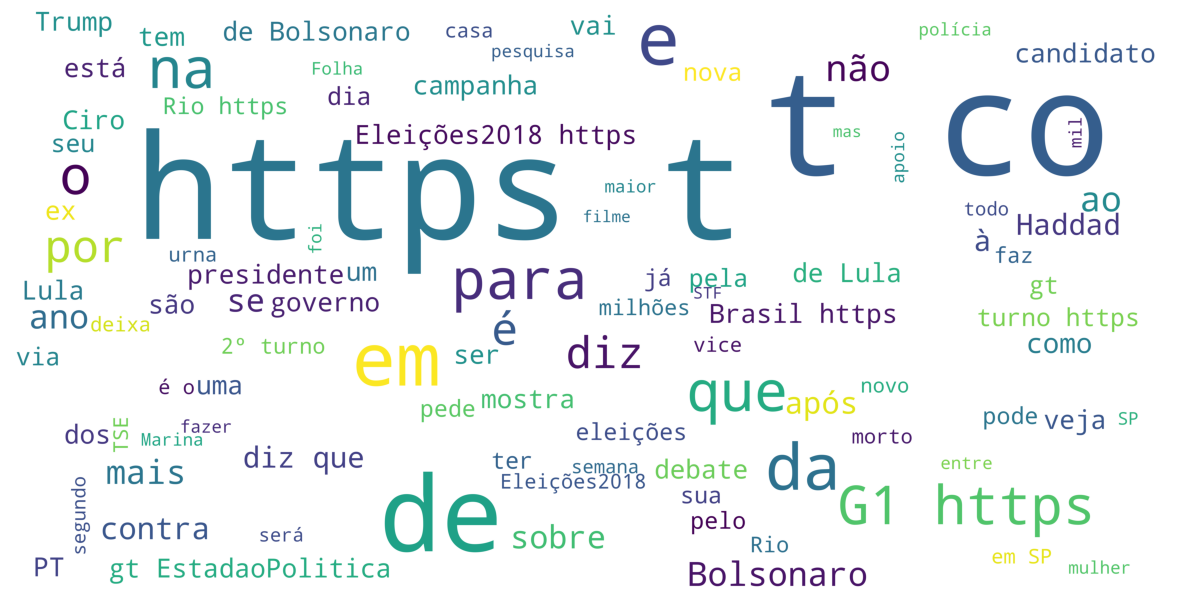

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_text = ''.join(df.tweet_text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Revisando nosso dicionário

Vamos limpar stopwords, pontuação e termos que julgamos não úteis.

### Stop words

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("portuguese"))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['&', 'gt', ';', '@', 'fausto_macedo', 'delatores', 'revelam', 'operador', 'propinas', 'reunião']
doc_words[ 1 ] ['shark', 'tank', ':', 'investidores', 'apontam', 'maiores', 'erros', 'empreendedores', 'https', ':']
doc_words[ 2 ] ['instagram', 'novo', 'ceo', 'após', 'saída', 'abrupta', 'cofundadores', 'https', ':']
doc_words[ 3 ] ['alta', 'dólar', ',', 'preço', 'diesel', 'sobe', '14,4', '%', 'nesta', 'sexta']
doc_words[ 4 ] ['cbf', ',', 'neymar', "'corajosa", 'destacada', 'participação', "'", 'copa', '.', 'https']
doc_words[ 5 ] ['&', 'gt', ';', '@', 'estadaopolitica', 'marcio', 'lacerda', 'desiste', 'disputar', 'governo']
doc_words[ 6 ] ['sabe', 'situação', 'título', 'eleitoral', 'regular', '?', 'https', ':', '#', 'eleicoes2018']
doc_words[ 7 ] ['mulher', 'nasceu', 'pernas', ',', 'abandonada', 'pais', 'virou', 'atleta', 'modelo', 'https']
doc_words[ 8 ] ['gravação', ',', 'ex-assessora', 'trump', 'ameaça', 'revelar', 'corrupção', '-', 'via', '@']
doc_words[ 9 ] ['partido

### Pontuação



In [ ]:
import string
print(string.punctuation)
trash = [e for e in string.punctuation]

for e in ['http','https']:
  trash.append(e)

print(trash)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'http', 'https']


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]
  tokens_clean = [each for each in tokens_clean if each not in trash]
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['gt', 'fausto_macedo', 'delatores', 'revelam', 'operador', 'propinas', 'reunião', 'hotel', '‘', 'ajuste']
doc_words[ 1 ] ['shark', 'tank', 'investidores', 'apontam', 'maiores', 'erros', 'empreendedores']
doc_words[ 2 ] ['instagram', 'novo', 'ceo', 'após', 'saída', 'abrupta', 'cofundadores']
doc_words[ 3 ] ['alta', 'dólar', 'preço', 'diesel', 'sobe', '14,4', 'nesta', 'sexta', '31']
doc_words[ 4 ] ['cbf', 'neymar', "'corajosa", 'destacada', 'participação', 'copa', '']
doc_words[ 5 ] ['gt', 'estadaopolitica', 'marcio', 'lacerda', 'desiste', 'disputar', 'governo', 'minas', 'após', 'pressão']
doc_words[ 6 ] ['sabe', 'situação', 'título', 'eleitoral', 'regular', 'eleicoes2018', '']
doc_words[ 7 ] ['mulher', 'nasceu', 'pernas', 'abandonada', 'pais', 'virou', 'atleta', 'modelo', 'g1', '']
doc_words[ 8 ] ['gravação', 'ex-assessora', 'trump', 'ameaça', 'revelar', 'corrupção', 'via', 'estadaointer']
doc_words[ 9 ] ['partido', 'novo', 'afirma', 'vai', 'apoiar', 'nenhum', 'candidato

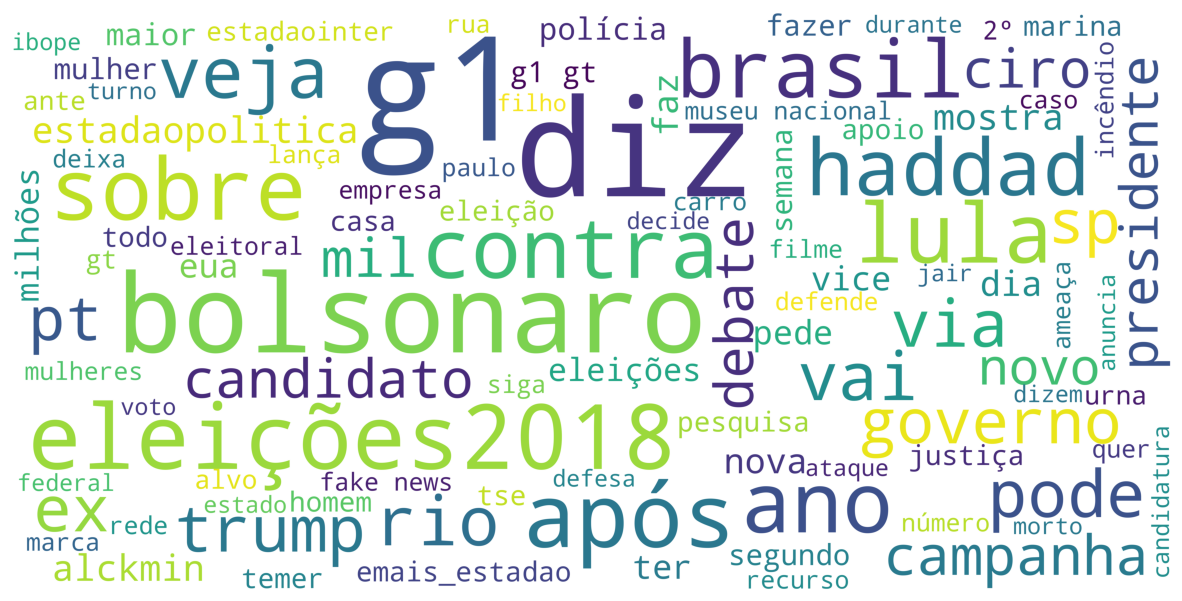

In [ ]:
from wordcloud import WordCloud

word_cloud_text = ''.join([' '.join(doc) for doc in doc_words])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Stemming

Essa transformação não aplicaremos aqui...

In [ ]:
nltk.download("rslp")

stemmer = nltk.stem.RSLPStemmer()
print(stemmer.stem('economista'))
print(stemmer.stem('economia'))
print(stemmer.stem('econômico'))




econom
econom
econôm


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words_before = doc_words
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]
  tokens_clean = [each for each in tokens_clean if each not in trash]
  tokens_clean = [stemmer.stem(each) for each in tokens_clean]
  doc_words.append(tokens_clean)

cleanTweetIds()

for i in range(10):
  print('doc_words[', i , ']',doc_words[i][0:10])

doc_words = doc_words_before # voltando sem stemming

doc_words[ 0 ] ['gt', 'fausto_maced', 'dela', 'revel', 'oper', 'propin', 'reun', 'hotel', '‘', 'ajust']
doc_words[ 1 ] ['shark', 'tank', 'invest', 'apont', 'mai', 'err', 'empreend']
doc_words[ 2 ] ['instagr', 'nov', 'ceo', 'após', 'saíd', 'abrupt', 'cofund']
doc_words[ 3 ] ['alt', 'dól', 'preç', 'diesel', 'sob', '14,4', 'nest', 'sext', '31']
doc_words[ 4 ] ['cbf', 'neym', "'coraj", 'destac', 'particip', 'cop', '']
doc_words[ 5 ] ['gt', 'estadaopoli', 'marci', 'lacerd', 'desist', 'disput', 'govern', 'min', 'após', 'press']
doc_words[ 6 ] ['sab', 'situ', 'títul', 'eleitor', 'regul', 'eleicoes2018', '']
doc_words[ 7 ] ['mulh', 'nasc', 'pern', 'abandon', 'pal', 'vir', 'atlet', 'model', 'g1', '']
doc_words[ 8 ] ['grav', 'ex-asses', 'trump', 'ameaç', 'revel', 'corrupç', 'via', 'estadaoint']
doc_words[ 9 ] ['part', 'nov', 'afirm', 'vai', 'apoi', 'nenhum', 'candidat', '2º', 'turn']


## Criando nosso Novo Dicionário Clean, 29K!

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'': 0, 'ajuste': 1, 'delatores': 2, 'fausto_macedo': 3, 'gt': 4, 'hotel': 5, 'mercado': 6, 'operador': 7, 'propinas': 8, 'reunião': 9, 'revelam': 10, 'rodoanel': 11, '‘': 12, '’': 13, 'apontam': 14, 'empreendedores': 15, 'erros': 16, 'investidores': 17, 'maiores': 18, 'shark': 19, 'tank': 20, 'abrupta': 21, 'após': 22, 'ceo': 23, 'cofundadores': 24, 'instagram': 25, 'novo': 26, 'saída': 27, '14,4': 28, '31': 29, 'alta': 30, 'diesel': 31, 'dólar': 32, 'nesta': 33, 'preço': 34, 'sexta': 35, 'sobe': 36, "'corajosa": 37, 'cbf': 38, 'copa': 39, 'destacada': 40, 'neymar': 41, 'participação': 42, 'desiste': 43, 'disputar': 44, 'estadaopolitica': 45, 'governo': 46, 'lacerda': 47, 'marcio': 48, 'minas': 49, 'pressão': 50, 'psb': 51, 'eleicoes2018': 52, 'eleitoral': 53, 'regular': 54, 'sabe': 55, 'situação': 56, 'título': 57, 'abandonada': 58, 'atleta': 59, 'g1': 60, 'modelo': 61, 'mulher': 62, 'nasceu': 63, 'pais': 64, 'pernas': 65, 'virou': 66, 'ameaça': 67, 'corrupção': 68, 'estadaointer': 6

In [ ]:
print(len(dictionary.token2id))

4240


### BOW de um documento

In [ ]:
print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
  bow.append(dictionary.doc2bow(doc_words[i]))

for i in range(-3,3):
  print('doc_words[', i , ']',bow[i])
  print('\n')


{'': 0, 'ajuste': 1, 'delatores': 2, 'fausto_macedo': 3, 'gt': 4, 'hotel': 5, 'mercado': 6, 'operador': 7, 'propinas': 8, 'reunião': 9, 'revelam': 10, 'rodoanel': 11, '‘': 12, '’': 13, 'apontam': 14, 'empreendedores': 15, 'erros': 16, 'investidores': 17, 'maiores': 18, 'shark': 19, 'tank': 20, 'abrupta': 21, 'após': 22, 'ceo': 23, 'cofundadores': 24, 'instagram': 25, 'novo': 26, 'saída': 27, '14,4': 28, '31': 29, 'alta': 30, 'diesel': 31, 'dólar': 32, 'nesta': 33, 'preço': 34, 'sexta': 35, 'sobe': 36, "'corajosa": 37, 'cbf': 38, 'copa': 39, 'destacada': 40, 'neymar': 41, 'participação': 42, 'desiste': 43, 'disputar': 44, 'estadaopolitica': 45, 'governo': 46, 'lacerda': 47, 'marcio': 48, 'minas': 49, 'pressão': 50, 'psb': 51, 'eleicoes2018': 52, 'eleitoral': 53, 'regular': 54, 'sabe': 55, 'situação': 56, 'título': 57, 'abandonada': 58, 'atleta': 59, 'g1': 60, 'modelo': 61, 'mulher': 62, 'nasceu': 63, 'pais': 64, 'pernas': 65, 'virou': 66, 'ameaça': 67, 'corrupção': 68, 'estadaointer': 6

### Criando nosso 'Corpus' de Documentos

O 'Corpus' é uma base contendo todos os documentos.

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in doc_words]

In [ ]:
len(corpus) == len(doc_words)


True

### TF-IDF de um Documento

Uma representação que leva em conta a quantidade de têrmos na coleção (corpus).

$$ w_{i,j} = tf_{ij} \times log( \frac{N}{df_i} ) $$  

Novamente veja a representação compactada.

In [ ]:
tf_idf = gensim.models.TfidfModel(corpus)
# for doc in tf_idf[corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

### TF-IDF dos tweets

In [ ]:
print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
  bow.append(dictionary.doc2bow(doc_words[i]))

tfidf = []

for i in range(0,100):
  tfidf.append(tf_idf[bow[i]])

for i in range(-3,3):
  print('doc_words[', i , ']',bow[i])
  print('doc_words[', i , ']',tfidf[i])
  print('\n')


{'': 0, 'ajuste': 1, 'delatores': 2, 'fausto_macedo': 3, 'gt': 4, 'hotel': 5, 'mercado': 6, 'operador': 7, 'propinas': 8, 'reunião': 9, 'revelam': 10, 'rodoanel': 11, '‘': 12, '’': 13, 'apontam': 14, 'empreendedores': 15, 'erros': 16, 'investidores': 17, 'maiores': 18, 'shark': 19, 'tank': 20, 'abrupta': 21, 'após': 22, 'ceo': 23, 'cofundadores': 24, 'instagram': 25, 'novo': 26, 'saída': 27, '14,4': 28, '31': 29, 'alta': 30, 'diesel': 31, 'dólar': 32, 'nesta': 33, 'preço': 34, 'sexta': 35, 'sobe': 36, "'corajosa": 37, 'cbf': 38, 'copa': 39, 'destacada': 40, 'neymar': 41, 'participação': 42, 'desiste': 43, 'disputar': 44, 'estadaopolitica': 45, 'governo': 46, 'lacerda': 47, 'marcio': 48, 'minas': 49, 'pressão': 50, 'psb': 51, 'eleicoes2018': 52, 'eleitoral': 53, 'regular': 54, 'sabe': 55, 'situação': 56, 'título': 57, 'abandonada': 58, 'atleta': 59, 'g1': 60, 'modelo': 61, 'mulher': 62, 'nasceu': 63, 'pais': 64, 'pernas': 65, 'virou': 66, 'ameaça': 67, 'corrupção': 68, 'estadaointer': 6

# Word Embedding, **`word2vec`**

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
model_CBOW = Word2Vec(doc_words, min_count=1, workers=3, vector_size= 50, window =5, sg = 0) # sg = 0 means CBOW
model_SGRAM = Word2Vec(doc_words, min_count=1, workers=3, vector_size= 50,window =5, sg = 1)

In [ ]:
model_CBOW.wv.index_to_key

['',
 'g1',
 'diz',
 'gt',
 'bolsonaro',
 'brasil',
 'após',
 'eleições2018',
 'haddad',
 'sobre',
 '’',
 'lula',
 'anos',
 'contra',
 '‘',
 'rio',
 'veja',
 'campanha',
 'r',
 'ciro',
 'turno',
 'eua',
 'governo',
 'estadaopolitica',
 'sp',
 'vai',
 'trump',
 'pt',
 'pode',
 'alckmin',
 'mil',
 'marina',
 '“',
 '”',
 'eleições',
 'debate',
 'tse',
 'mostra',
 'nacional',
 '``',
 'justiça',
 '2º',
 "''",
 'ter',
 'candidatos',
 'paulo',
 'presidente',
 'vídeo',
 'faz',
 'pesquisa',
 'casa',
 'pede',
 'novo',
 'milhões',
 '2018',
 '-via',
 'deixa',
 'stf',
 'eleição',
 'folha',
 'maior',
 'polícia',
 'nesta',
 'dólar',
 'eleitoral',
 'vice',
 'via',
 'fazer',
 'temer',
 'nova',
 'fake',
 'semana',
 'emais_estadao',
 'estadaointer',
 'número',
 'dia',
 'urnas',
 'museu',
 'homem',
 'segundo',
 'vivo',
 'apoio',
 'mulheres',
 'país',
 'esportefera',
 'redes',
 '2',
 'menos',
 'antes',
 'news',
 'defende',
 'sociais',
 'silva',
 'defesa',
 'quer',
 'pessoas',
 'lei',
 'siga',
 'mundo',
 'm

In [ ]:
len(model_CBOW.wv.index_to_key)

4240

In [ ]:
model_CBOW.wv['bayer']

array([ 1.1458191e-02,  1.5643479e-02,  1.8044803e-02, -1.1305728e-02,
       -1.1846527e-02, -1.1796885e-02,  5.8620144e-03,  8.3798366e-03,
       -1.2113820e-02, -9.6380971e-03,  2.5919097e-04,  3.7058846e-03,
        1.8270932e-02, -1.4593895e-02, -7.2677457e-03,  4.1006333e-03,
       -7.8195939e-03,  8.3557930e-04,  2.8122377e-03, -1.1408380e-02,
       -1.9411568e-02, -6.5235500e-03,  9.0943808e-03, -7.9120355e-06,
       -6.8839788e-03, -6.3506607e-03, -5.5256311e-04,  1.2845852e-03,
        1.4357401e-02, -1.9334967e-03,  1.1720754e-02,  1.0803889e-02,
        7.7155228e-03,  1.9015897e-02, -1.3082061e-02,  3.7310850e-03,
       -1.0443069e-02,  5.1344396e-03,  1.1878764e-02, -1.0516725e-02,
        1.2446851e-03,  1.0417052e-02,  1.7759517e-02,  1.0892283e-03,
       -1.7127346e-02, -4.4719367e-03, -9.7559945e-04,  1.5861241e-02,
       -1.4732870e-02, -3.7541175e-03], dtype=float32)

In [ ]:
len(model_CBOW.wv['bayer'])

50

## Doc embedding

Cada documento é representado por uma média das *word vectors* de seus termos.

In [ ]:
doc_embed = []

for doc in doc_words:
  d = np.zeros(50)
  nr_words = 0
  for word in doc:
    if word in model_CBOW.wv.index_to_key:
      d = d + model_CBOW.wv[word]
      nr_words = nr_words + 1
  if nr_words != 0: # avoid all words not in the vocabulary :-()
    d = d / nr_words
  doc_embed.append(d)

print(len(doc_embed))
print(len(doc_embed[0]))

1000
50


## Cada documento é um vetor de dimensão 100

In [ ]:
for i in range(-2,2):
  print('doc_words[', i , ']',doc_words[i][0:10])
  print('doc_embed[', i , ']',doc_embed[i])

doc_words[ -2 ] ['vivo', 'ministro', 'jorge', 'mussi', 'pede', 'imediata', 'execução', 'decisão', 'tornar', 'lula']
doc_embed[ -2 ] [ 2.58942737e-04  6.20483506e-04  2.64096157e-03  1.79399172e-03
  3.41563875e-03 -2.11283551e-03  5.71666203e-03 -2.97940711e-03
 -5.09774236e-03  8.95381878e-05  3.04232960e-03  9.71779915e-04
  4.57306074e-03  5.01495924e-03  3.34089001e-03  1.96407611e-03
  4.85333539e-03 -3.37525736e-03 -2.84630579e-03  3.79496938e-03
 -2.99436140e-03  1.59743905e-03  4.79691854e-03 -1.85058137e-03
  1.26230536e-03  6.56998463e-04 -4.13111315e-03 -8.48306591e-04
 -1.28546830e-03 -1.37268467e-03  4.10935055e-03 -2.53335657e-04
 -2.46299533e-03  2.39934098e-03 -2.08399917e-03  2.05022271e-03
  1.55553905e-03  2.67663491e-03  2.03924020e-03 -1.45137895e-03
  2.44513277e-04 -7.63687653e-05 -5.45500148e-04 -3.23860376e-03
  3.69509956e-03 -1.83315804e-03 -6.78829130e-03 -2.57372736e-03
  3.16532530e-03  3.43630659e-04]
doc_words[ -1 ] ["'consegui", 'escapar', 'seita', 'apo

## **Machine Learning**: Aplicando um modelo de classifição

Com essa representação podemos, por exemplo, aplicar um modelo de **Machine Learning** para fazer a classificação de Tweets. Aqui empregamos uma Árvore de Decisão para *predizer* se um Tweet é do Estadão.

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X = doc_embed
y = df.query_used == 'estadao'

# Para aplica um modelo knn
# n_neighbors = 5
# clf = neighbors.KNeighborsClassifier(n_neighbors)

seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',
                               max_depth=None,
                               random_state=seed)

# Treinamento (Treina o Modelo)
clf.fit(X_train, y_train)

# Predição (Emprega o Modelo)
y_pred = clf.predict(X_test)

print(y_pred)

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[False False False False False False False  True False False False False
 False False False False  True False False False  True  True False  True
 False False False False  True False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False  True False  True False False
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False  True False False False False False False  True False False False
 False False False False False False  True False False False False False
 False  True False False False False False False  True  True False False
  True False False  True  True False False False Fa

## Word Embedding Públicos

Para uma aplicação geral você pode querer empregar modelos públicos já treinados.

http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc#

Recursos vetoriais prontos para serem utilizados nas tarefas de Processamento da Linguagem Natural e Aprendizado de Máquina. O repositório traz vetores gerados a partir de um grande córpus do português do Brasil e português europeu, de fontes e gêneros variados. Foram utilizados dezessete córpus diferentes, totalizando **1,395,926,282 tokens**. O treinamento dos vetores ocorreu em algoritmos como Word2vec [1], FastText [2], Wang2vec [3] e Glove [4].



In [ ]:
# Uns 30min para executar

# !wget https://meusite.mackenzie.br/rogerio/cbow_s50/cbow_s50.txt
# model = KeyedVectors.load_word2vec_format('/content/cbow_s50.txt')

# Empregando o *Corpus* de Machado de Assis

Em vez disso vamos empregar um *Corpus* de documento menor. Vamos empregar o texto completo de **Dom Casmurro** de *Machado de Assis* e empregar nosso modelo `word2vec` para verificar a similaridade de documentos com um texto de Machado de Assis.

In [ ]:
import nltk
nltk.download('machado')


[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

Este unzip é mais ou menos trick e não consta da documentação do nltk em português...  http://www.nltk.org/howto/portuguese_en.html.

In [ ]:
!unzip /root/nltk_data/corpora/machado.zip -d /root/nltk_data/corpora/

Archive:  /root/nltk_data/corpora/machado.zip
replace /root/nltk_data/corpora/machado/CONTENTS? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /root/nltk_data/corpora/machado/CONTENTS  
replace /root/nltk_data/corpora/machado/contos/macn001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /root/nltk_data/corpora/machado/contos/macn001.txt  
replace /root/nltk_data/corpora/machado/contos/macn002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /root/nltk_data/corpora/machado/contos/macn002.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn003.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn004.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn005.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn006.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn007.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn008.txt  
  inflating: /root/nltk_data/corpora/machado/contos/macn009.txt  
  inflating: /

In [ ]:
print(nltk.corpus.machado.fileids())

['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt', 'contos/macn011.txt', 'contos/macn012.txt', 'contos/macn013.txt', 'contos/macn014.txt', 'contos/macn015.txt', 'contos/macn016.txt', 'contos/macn017.txt', 'contos/macn018.txt', 'contos/macn019.txt', 'contos/macn020.txt', 'contos/macn021.txt', 'contos/macn022.txt', 'contos/macn023.txt', 'contos/macn024.txt', 'contos/macn025.txt', 'contos/macn026.txt', 'contos/macn027.txt', 'contos/macn028.txt', 'contos/macn029.txt', 'contos/macn030.txt', 'contos/macn031.txt', 'contos/macn032.txt', 'contos/macn033.txt', 'contos/macn034.txt', 'contos/macn035.txt', 'contos/macn036.txt', 'contos/macn037.txt', 'contos/macn038.txt', 'contos/macn039.txt', 'contos/macn040.txt', 'contos/macn041.txt', 'contos/macn042.txt', 'contos/macn043.txt', 'contos/macn044.txt', 'contos/macn045.txt', 'contos/m

In [ ]:
# from http://www.nltk.org/howto/portuguese_en.html

from nltk.corpus import machado
print(machado.fileids()[0:10])
print('Número de obras de NLTK Machado: ', len(machado.fileids()))


['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt']
Número de obras de NLTK Machado:  246


In [ ]:
machado.words('romance/marm08.txt')

['Romance', ',', 'Dom', 'Casmurro', ',', '1899', 'Dom', ...]

In [ ]:
machado.raw('romance/marm08.txt')[1000:1200].replace('\n',' ')


' Os vizinhos, que não gostam dos meus hábitos reclusos e calados, deram curso à alcunha, que afinal pegou. Nem por isso me zanguei. Contei a anedota aos amigos da cidade, e eles, por graça, chamam-me '

## Criando o Modelo

In [ ]:
import gensim
from gensim.models import Word2Vec

doc_words = [list(machado.words('romance/marm08.txt'))]

model_SGRAM = Word2Vec(doc_words, min_count=1,vector_size= 50, workers=3, window =8, sg = 1)

In [ ]:
model_SGRAM.wv.index_to_key

[',',
 '.',
 'que',
 'a',
 'e',
 'de',
 '-',
 'o',
 'não',
 ';',
 'me',
 '\x97',
 'se',
 'um',
 'é',
 'os',
 'da',
 'do',
 'para',
 'com',
 'as',
 'mas',
 'lhe',
 'era',
 'eu',
 'em',
 'uma',
 'por',
 'Capitu',
 'mais',
 '?',
 'como',
 'ao',
 'Não',
 '...',
 'minha',
 'na',
 'no',
 'à',
 'ou',
 '!',
 'A',
 'mãe',
 'ele',
 ':',
 'nem',
 'dos',
 'foi',
 'ela',
 'disse',
 'casa',
 'ser',
 'O',
 'mim',
 'olhos',
 'meu',
 'José',
 'só',
 'tudo',
 'Dias',
 'muito',
 'também',
 'CAPÍTULO',
 'vez',
 'das',
 'depois',
 'outra',
 'sem',
 'ainda',
 'nada',
 'lo',
 'já',
 "'",
 'E',
 'assim',
 'mesmo',
 'nos',
 'tempo',
 'há',
 'agora',
 'tão',
 'quando',
 'Escobar',
 'dia',
 'tinha',
 'outro',
 'Mas',
 'coisa',
 'dizer',
 'até',
 'eram',
 'você',
 'ia',
 'fez',
 'Era',
 'isto',
 'vida',
 'padre',
 'seminário',
 'bem',
 'dela',
 'aos',
 'la',
 'melhor',
 'estava',
 'fosse',
 'ir',
 'ver',
 'aqui',
 'palavras',
 'mal',
 'logo',
 'Quando',
 'antes',
 'esta',
 'pode',
 'este',
 'outros',
 'idéia',
 '

In [ ]:
len(model_SGRAM.wv.index_to_key)

9717

In [ ]:
len(model_SGRAM.wv['mesmo'])

50

## Outras funções

Assim como o `NLTK` implementa funções sobre representações BOW e TFIDF, temos também funções semelhantes para o `word2vec`. Por exemplo, abaixo, a similaridade de palavras.

Entretanto, não exploraremos aqui essas funções.

In [ ]:
emb = model_SGRAM.wv['amor']

print(emb.shape)
print(emb)

(50,)
[-0.1647241   0.0418138   0.02791509  0.13125117 -0.13349262 -0.20136791
  0.07157895  0.25587547 -0.2852112  -0.10105266 -0.05871834 -0.17611066
  0.11969464  0.04300034 -0.04453902  0.08493646  0.1213537   0.12836082
 -0.18576965 -0.15999009  0.07951163  0.24135935  0.27433538  0.1102552
  0.15362242  0.17836519 -0.20856111  0.21866879 -0.2787888   0.06341144
 -0.15739241 -0.21247791  0.12263101  0.01065951 -0.09966423  0.20556529
  0.29557937 -0.05927946 -0.0864094  -0.12799366  0.05645973 -0.06647805
 -0.0780177  -0.11031704  0.36638013 -0.01157637  0.05614121 -0.16618265
  0.09626426  0.1271817 ]


In [ ]:
model_SGRAM.wv.most_similar('amor', topn=10)

[('Céu', 0.9973633289337158),
 ('ficou', 0.9972248077392578),
 ('pensei', 0.9972213506698608),
 ('faziam', 0.9972043633460999),
 ('vizinho', 0.9971446394920349),
 ('São', 0.9970957636833191),
 ('amigos', 0.9969503879547119),
 ('vou', 0.9968820810317993),
 ('porta', 0.9968655109405518),
 ('Tal', 0.9968631267547607)]

## Comparando Textos

Vamos agora ler 3 diferentes textos e compará-los com um texto de Machado de Assis. Um texto é do mesmo autor, um outro da escritora Clarice Lispector e um terceiro um texto geral do Brasil retirado da wikipedia.

In [ ]:
import urllib.request

docs = []

for f in ['machado.txt','machado2.txt','clarice.txt','brasil.txt']:
  doc = ''
  for line in urllib.request.urlopen('http://meusite.mackenzie.br/rogerio/' + f):
    doc = doc + line.decode('utf-8')
  docs.append(doc.replace("\r\n", " "))

for i in range(len(docs)):
  docs[i] = docs[i].replace("\r\n", " ")

import string
print('trash...')
print(string.punctuation)
trash = [e for e in string.punctuation]

trash...
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Machado de Assis
docs[0]

'Enganava-se o digno magistrado; o médico arranjou tudo. Uma vez empossado da licença começou logo a construir a casa. Era na Rua Nova, a mais bela rua de Itaguaí naquele tempo; tinha cinquenta janelas por lado, um pátio no centro, e numerosos cubículos para os hóspedes. Como fosse grande arabista, achou no Corão que Maomé declara veneráveis os doidos, pela consideração de que Alá lhes tira o juízo para que não pequem. A ideia pareceu-lhe bonita e profunda, e ele a fez gravar no frontispício da casa; mas, como tinha medo ao vigário, e por tabela ao bispo, atribuiu o pensamento a Benedito VII, merecendo com essa fraude, aliás pia, que o Padre Lopes lhe contasse, ao almoço, a vida daquele pontífice eminente.'

In [ ]:
# Machado de Assis
docs[1]

'E tinha razão. De todas as vilas e arraiais vizinhos afluíam loucos à Casa Verde. Eram furiosos, eram mansos, eram monomaníacos, era toda a família dos deserdados do espírito. Ao cabo de quatro meses, a Casa Verde era uma povoação. Não bastaram os primeiros cubículos; mandou-se anexar uma galeria de mais trinta e sete. O Padre Lopes confessou que não imaginara a existência de tantos doidos no mundo, e menos ainda o inexplicável de alguns casos. Um, por exemplo, um rapaz bronco e vilão, que todos os dias, depois do almoço, fazia regularmente um discurso acadêmico, ornado de tropos, de antíteses, de apóstrofes, com seus realces de grego e latim, e suas borlas de Cícero,  Apuleio e Tertuliano. O vigário não queria acabar de crer. Quê! Um rapaz que ele vira, três meses antes, jogando peteca na rua!'

In [ ]:
# Clarisse Lispector
docs[2]

'O relógio bate 9 horas. Uma pancada alta, sonora, seguida de uma badalada suave, um eco. Depois, o silêncio. A clara mancha de sol se estende aos poucos pela relva do jardim. Vem subindo pelo muro vermelho da casa, fazendo brilhar a trepadeira em mil luzes de orvalho. Encontra uma abertura, a janela. Penetra. E apodera-se de repente do aposento, burlando a vigilância da cortina leve. Luísa continua imóvel,estendida sobre os lençóis revoltos, os cabelosespalhados no travesseiro. Um braço cá, outro lá,crucificada pela lassidão. O calor do sol e sua claridade enchem o quarto. Luísa pestaneja. Franze as sobrancelhas. Faz um trejeito com a boca. Abre os olhos, finalmente,e deixa-os parados no teto. Aos poucos o dia vai-lhe entrando pelo corpo. Ouve um ruído de folhas secas pisadas. Passos longínquos, miúdose apressados. Uma criança corre na estrada, pensa. De novo, o silêncio. Diverte-se um momento escutando-o. É absoluto,como de morte. Naturalmente porque a casa é retirada, bem isolada. M

In [ ]:
# Brasil, Wikipedia
docs[3]

'O Brasil, um vasto país sul-americano, estende-se da Bacia Amazônica, no norte, até os vinhedos e as  gigantescas Cataratas do Iguaçu, no sul. O Rio de Janeiro, simbolizado pela sua estátua de 38 metros  de altura do Cristo Redentor, situada no topo do Corcovado, é famoso pelas movimentadas praias de  Copacabana e Ipanema, bem como pelo imenso e animado Carnaval, com desfiles de carros alegóricos,  fantasias extravagantes e samba.'

## Tokenize

In [ ]:
doc_words = [] # tokenize

for doc in docs:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in trash]
  doc_words.append(tokens_clean)

for i in range(len(docs)):
  print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['enganava-se', 'o', 'digno', 'magistrado', 'o', 'médico', 'arranjou', 'tudo', 'uma', 'vez']
doc_words[ 1 ] ['e', 'tinha', 'razão', 'de', 'todas', 'as', 'vilas', 'e', 'arraiais', 'vizinhos']
doc_words[ 2 ] ['o', 'relógio', 'bate', '9', 'horas', 'uma', 'pancada', 'alta', 'sonora', 'seguida']
doc_words[ 3 ] ['o', 'brasil', 'um', 'vasto', 'país', 'sul-americano', 'estende-se', 'da', 'bacia', 'amazônica']


## Embedding Docs

In [ ]:
import numpy as np

def embed(doc_words, model, size=50):

  doc_embed = []

  for doc in doc_words:
    d = np.zeros(size)
    nr_words = 0
    for word in doc:
      if word in model.wv.index_to_key:
        d = d + model.wv[word]
        nr_words = nr_words + 1
    if nr_words != 0: # avoid all words not in the vocabulary :-()
      d = d / nr_words
    doc_embed.append(d)

  return doc_embed

doc_SGRAM = embed(doc_words, model_SGRAM)


## Verificando a similaridade

[0.99995613 0.99992462 0.9997235 ]


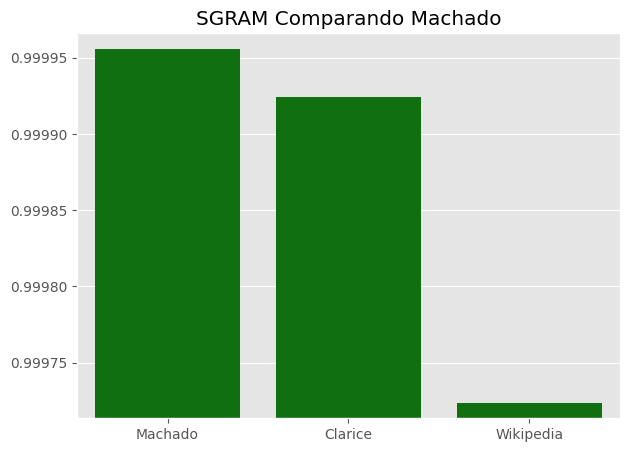

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

f = plt.figure(figsize=(7,5))
y=cosine_similarity(doc_SGRAM, doc_SGRAM)[0][1:4]
print(y)
sns.barplot(x=['Machado','Clarice','Wikipedia'],y=y,color='green')
plt.ylim(min(y)-0.00001,max(y)+0.00001)
plt.title('SGRAM Comparando Machado')
plt.show()


# Conclusão

 * **`word2vec`** representa uma alternativa eficiente e simples de representar documentos para processamento de linguagem natural e aprendizado de máquina.

 * Existem várias funções de processamento de linguagem, dessas e de outras bibliotecas, empregando **`word2vec`** e que nós não exploramos aqui. Particularmente não exploramos o uso do contexto dos termos.

 * Existem ainda diversos problemas práticos em que você pode aplicar esse modelo.
